In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz

In [2]:
steps_per_day = int((12 * 60 / 10) + 1)
plants_per_zone = 36
zone_id = 9
data_path = (
    f"/home/lolanff/plant-rl/data/online/E7/P4/LinearESARSA{zone_id}/z{zone_id}/raw.csv"
)
df = pd.read_csv(data_path)

df["time"] = pd.to_datetime(df["time"])
edmonton_tz = pytz.timezone("America/Edmonton")
df["time"] = df["time"].dt.tz_convert(edmonton_tz)

In [3]:
df["plant_id"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [4]:
# let starting_index be the earliest instance when time = 09:10
start_index = int(
    df[(df["time"].dt.hour == 9) & (df["time"].dt.minute == 10)].index[0]
    / plants_per_zone
)
print(start_index)

0


1066


Text(0.5, 0, 'time step')

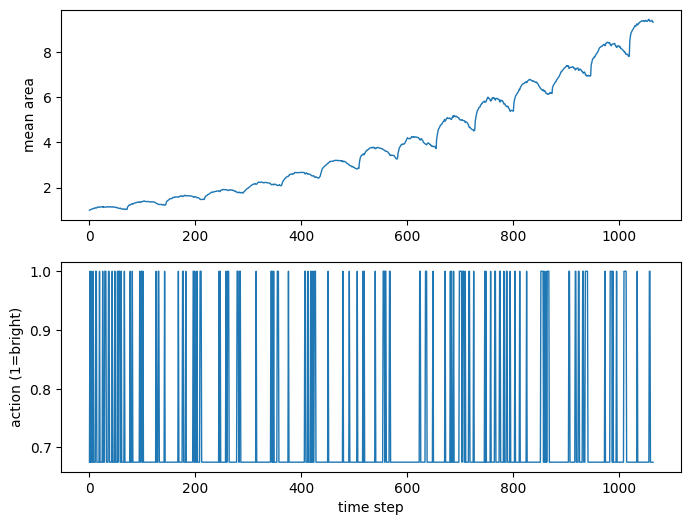

In [5]:
f, ax = plt.subplots(2, 1, figsize=(8, 6))

areas = df["mean_clean_area"].to_numpy()
areas = np.reshape(areas, (-1, plants_per_zone))
mean_area = np.array([np.mean(areas[i, :]) for i in range(areas.shape[0])])[
    start_index:
]
mean_area = mean_area / mean_area[0]

actions = df["action.0"].to_numpy()
actions = np.reshape(actions, (-1, plants_per_zone))
action = np.array([np.mean(actions[i, :]) for i in range(actions.shape[0])])[
    start_index:
]

# normalize action by the action.0 value for "bright"
action = action / 0.398
print(len(action))

ax[0].plot(mean_area, linewidth=1)
ax[0].set_ylabel("mean area")

ax[1].plot(action, linewidth=1)
ax[1].set_ylabel("action (1=bright)")
ax[1].set_xlabel("time step")

In [6]:
end_days = {
    "E8/P1/Bernoulli2/z2": 12,
    "E8/P1/Bernoulli3/z3": 12,
    "E8/P1/Bernoulli8/z8": 13,
    "E8/P1/Bernoulli9/z9": 14,
    "E7/P3/ESARSA3/z3": 14,
    "E7/P4/LinearESARSA6/z6": 13,
    "E7/P4/LinearESARSA8/z8": 13,
    "E7/P4/LinearESARSA9/z9": 13,
}

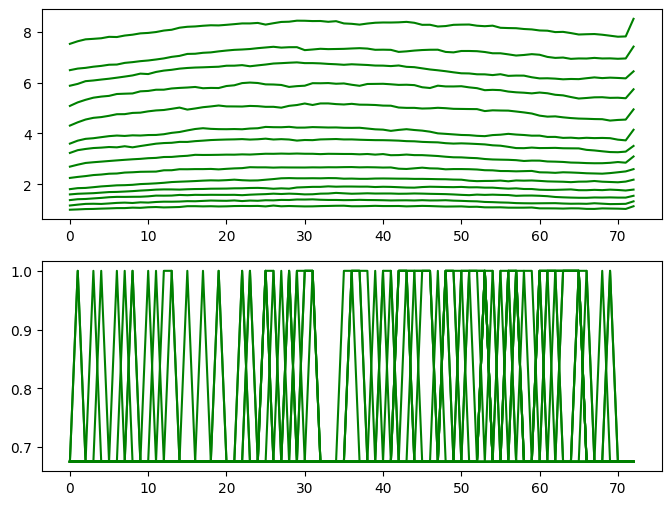

In [7]:
# Segment mean_area into segments of length "steps_per_day"
mean_area_days = np.array_split(mean_area[: int(14 * steps_per_day)], 14)
action_days = np.array_split(action[: int(14 * steps_per_day)], 14)

# plot each day as a curve
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
for i, (day_area, day_action) in enumerate(zip(mean_area_days, action_days)):
    ax[0].plot(day_area[:], color="green")
    ax[1].plot(day_action[:], color="green")